In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [2]:
iris.median(numeric_only=True)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

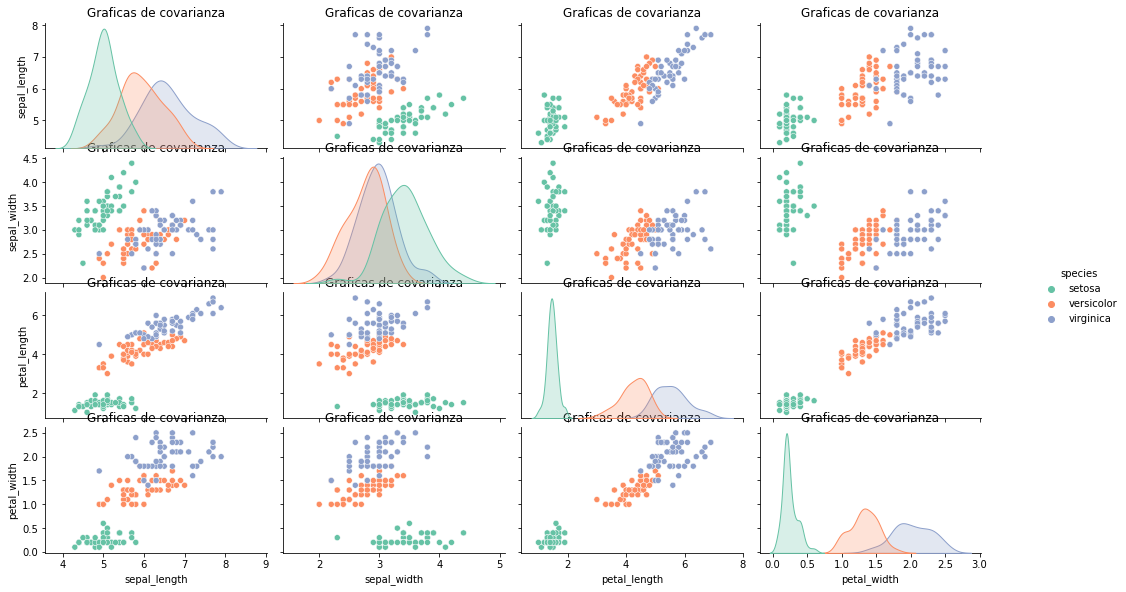

In [4]:
g = sns.pairplot(iris, 
             hue='species',
             palette='Set2')

g.fig.set_size_inches(16,8)

g.set(title='Graficas de covarianza')

plt.show()

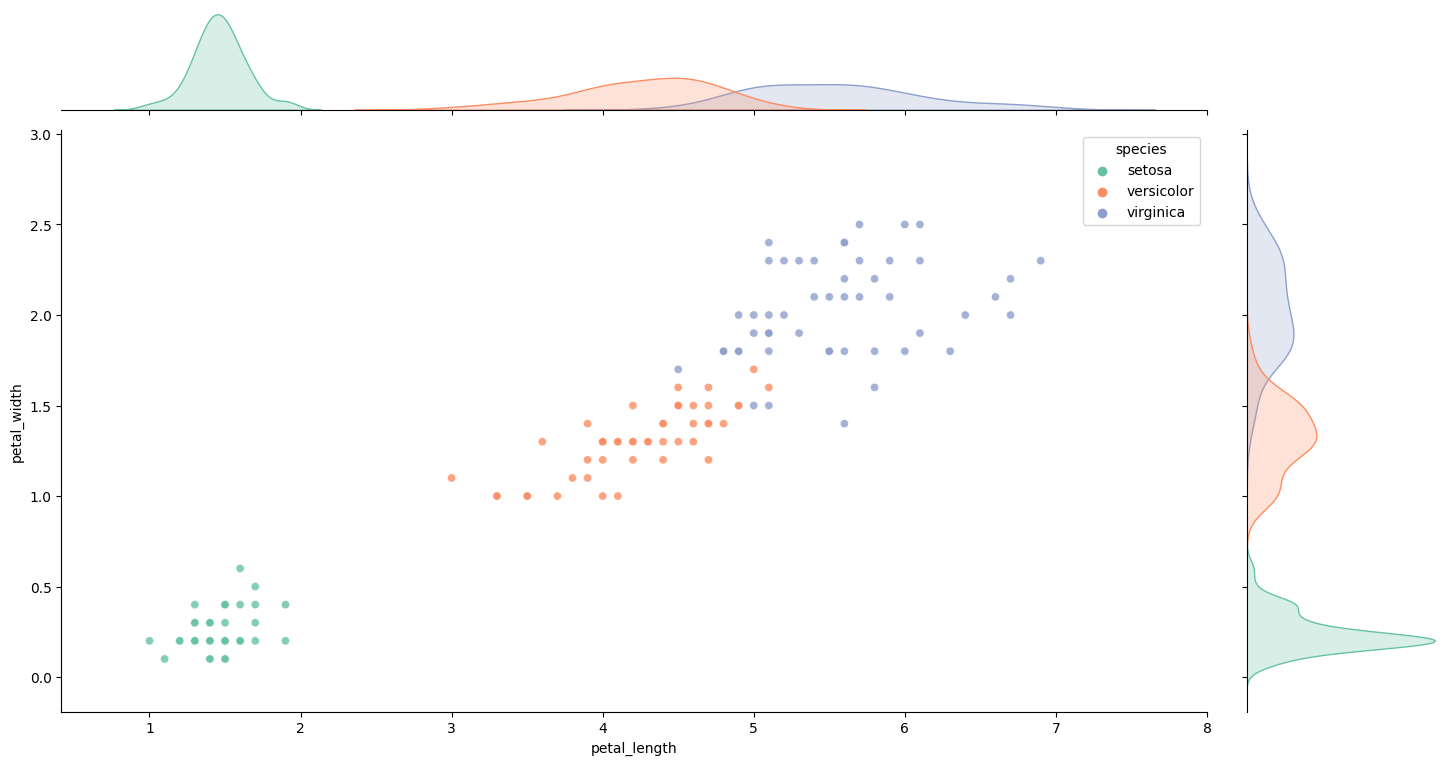

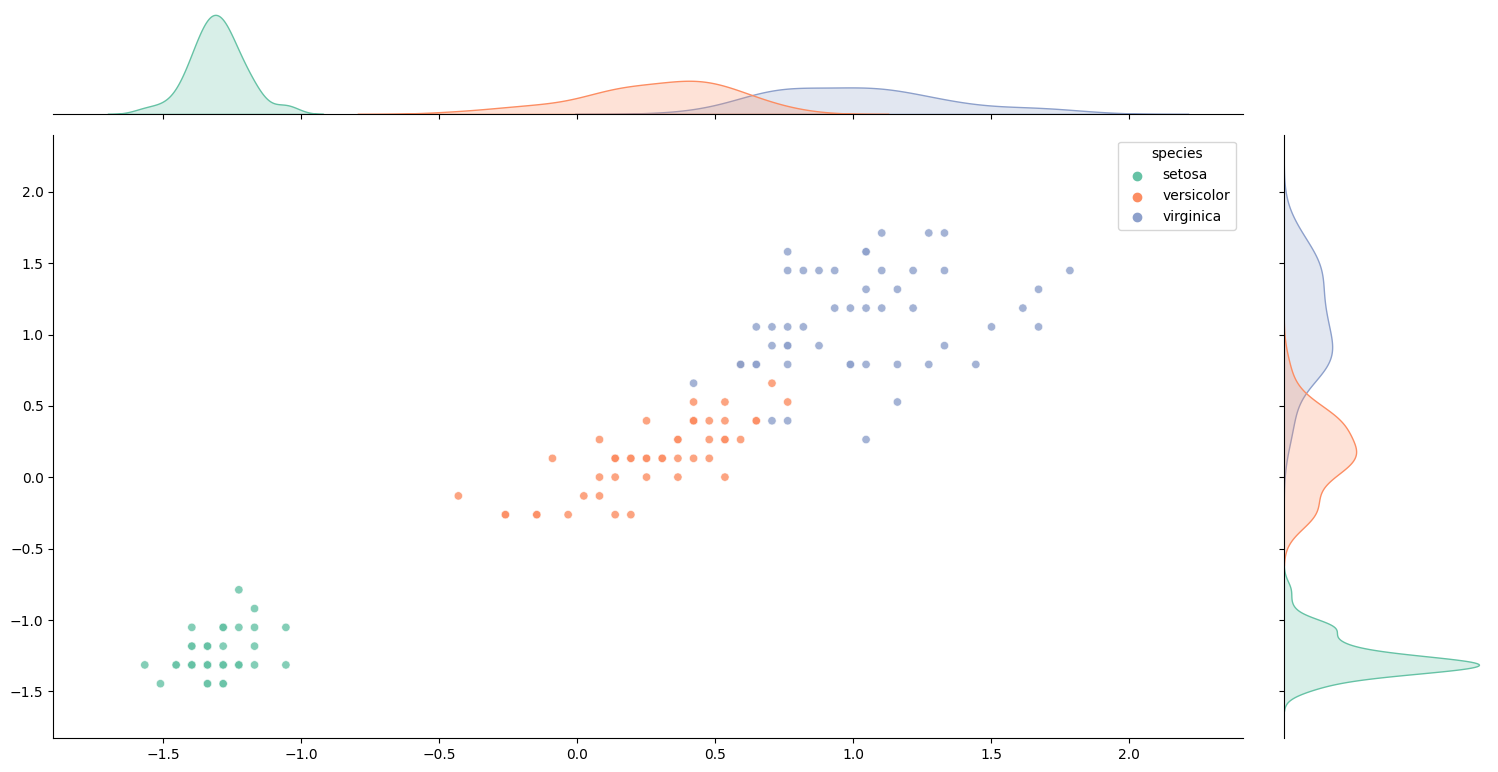

In [5]:
g1 = sns.jointplot(x=iris['petal_length'], 
                   y=iris['petal_width'], 
                   hue=iris['species'], 
                   palette='Set2',
                   alpha = 0.8)

g1.fig.set_size_inches(16,8)

g.fig.suptitle('Grafica de relacion de petal length/petal width')

g2 = sns.jointplot(x=scaled[:, 2], 
                   y=scaled[:,3], 
                   hue=iris['species'], 
                   palette='Set2',
                   alpha = 0.8)

g2.fig.set_size_inches(16,8)

g.fig.suptitle('Grafica de relacion scaled[:, 2]/scaled[:,3]')

plt.show()

In [6]:
fig1 = px.scatter(iris, 
                  x="petal_length", 
                  y="petal_width", 
                  color='species',color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  marginal_x="box", 
                  marginal_y="box",
                  opacity=0.8)

fig1.update_layout(title='Grafica Acido citrico/Alcohol',
                   font=dict(family = 'verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig1.show()

fig2 = px.scatter(iris, 
                  x=scaled[:, 2], 
                  y=scaled[:,3], 
                  color='species',color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  marginal_x="box", 
                  marginal_y="box",
                  opacity=0.8)

fig2.update_layout(title='Grafica de relacion scaled[:, 2]/scaled[:,3]',
                   font=dict(family = 'verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig2.show()

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [10]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [11]:
pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [13]:
reduced_scaled = pca.transform(scaled)

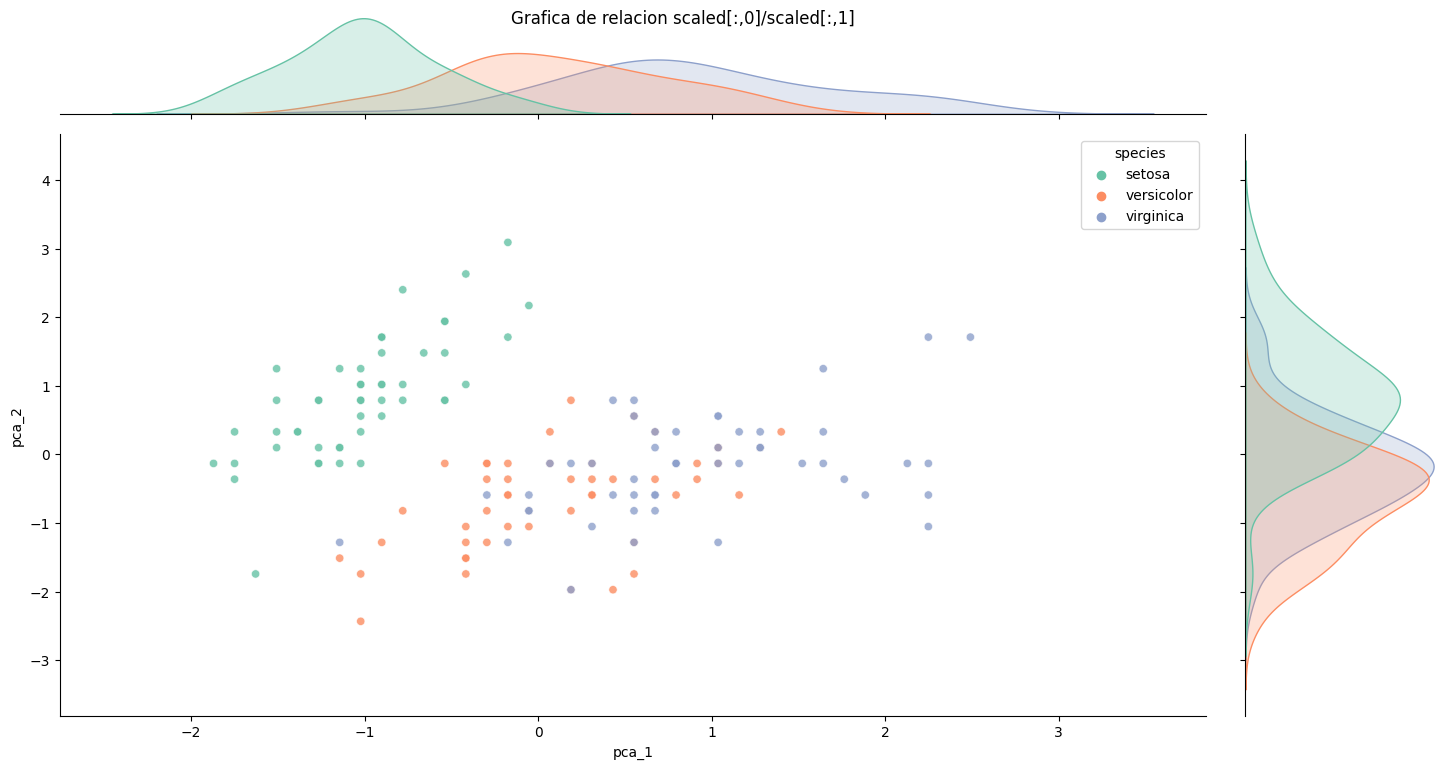

In [15]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]

g = sns.jointplot(x=iris['pca_1'], 
                  y=iris['pca_2'], 
                  hue=iris['species'],
                  palette='Set2', 
                  kind='scatter',
                  alpha = 0.8)

g.fig.set_size_inches(16,8)

g.fig.suptitle('Grafica de relacion scaled[:,0]/scaled[:,1]')

plt.show()

In [16]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005,-0.131979
146,6.3,2.5,5.0,1.9,virginica,0.553333,-1.282963
147,6.5,3.0,5.2,2.0,virginica,0.795669,-0.131979
148,6.2,3.4,5.4,2.3,virginica,0.432165,0.788808


In [17]:
fig2 = px.scatter(x=iris['pca_1'], 
                  y=iris['pca_2'], 
                  color=iris['species'],
                  color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  marginal_x="box", 
                  marginal_y="box",
                  opacity=0.8)

fig2.update_layout(title='Grafica de relacion scaled[:,0]/scaled[:,1]',
                   font=dict(family = 'verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')


fig2.show()


In [19]:
iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] = reduced_scaled[:,1]

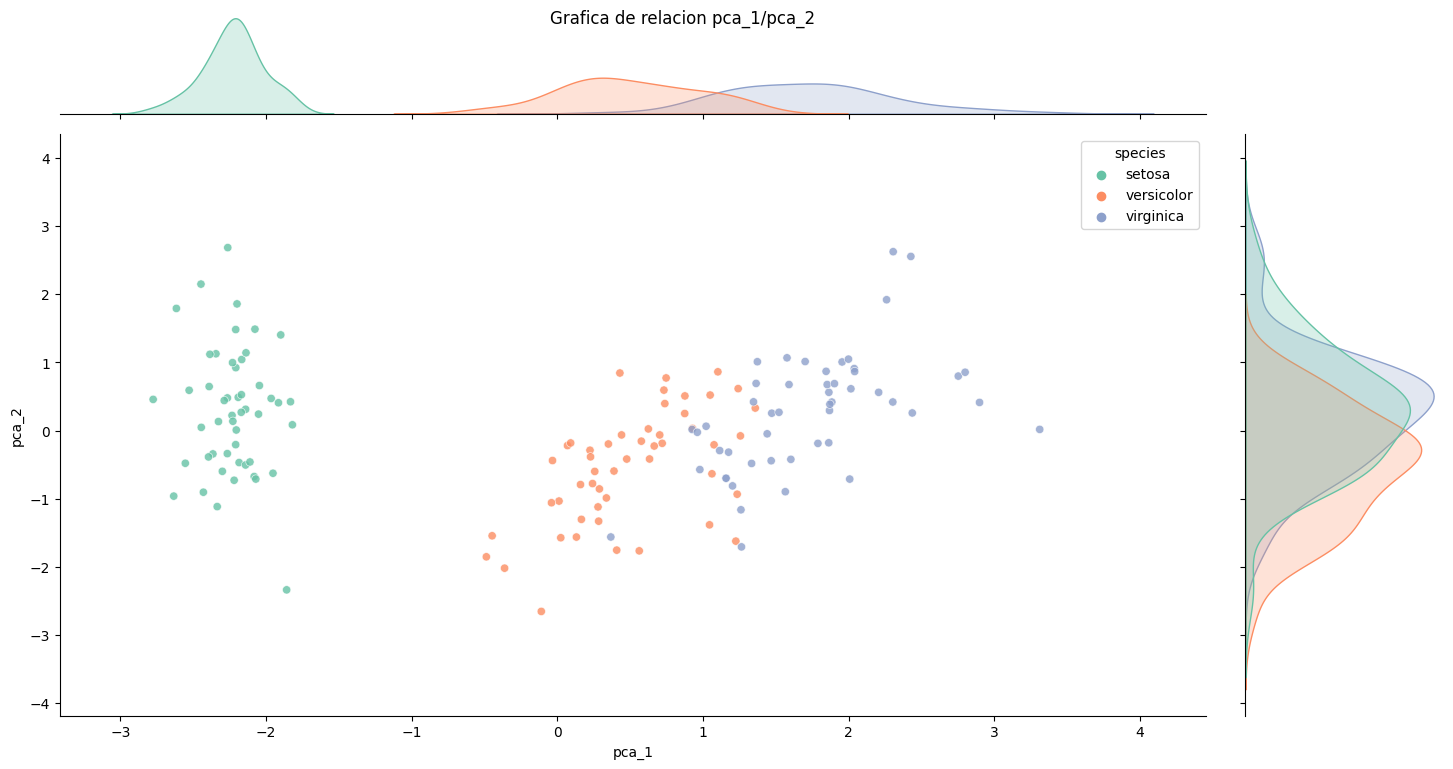

In [21]:
g = sns.jointplot(x=iris['pca_1'], 
                  y=iris['pca_2'], 
                  hue = iris['species'],
                  palette='Set2', 
                  kind='scatter',
                  alpha = 0.8)

g.fig.set_size_inches(16,8)

g.fig.suptitle('Grafica de relacion pca_1/pca_2')

plt.show()

In [20]:
fig3 = px.scatter(x=iris['pca_1'], 
                  y=iris['pca_2'], 
                  color=iris['species'],
                  color_discrete_sequence=['rgb(175, 100, 88)', '#479B55', '#FA0087'],
                  marginal_x="box", 
                  marginal_y="box",
                  opacity=0.8)

fig3.update_layout(title='Grafica de relacion reduced_scaled[:,0]/reduced_scaled[:,1]',
                   font=dict(family = 'verdana', size = 16, color = 'white'),
                   template='plotly_dark',
                   height=500,
                   width=900,
                   legend_bgcolor='rgb(117, 112, 179)')

fig3.show()

In [22]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9350738-38bd-458a-b2ca-e2031ac489b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>